In [3]:
import numpy as np
import scipy.io as sci
import matplotlib.pyplot as plt


['__header__', '__version__', '__globals__', 'FILE_NAME', 'FRAME_RATE', 'ANALOG_VIDEO_FRAME_RATIO', 'Left_Ankle_Angles', 'Left_Elbow_Angles', 'Left_Hip_Angles', 'Left_Knee_Angles', 'Left_Shoulder_Angles', 'Left_Wrist_Angles', 'Pelvis_Angles', 'Right_Ankle_Angles', 'Right_Elbow_Angles', 'Right_Hip_Angles', 'Right_Knee_Angles', 'Right_Shoulder_Angles', 'Right_Wrist_Angles', 'Trunk_Angles', 'Center_of_Mass']
__header__
__version__
__globals__
FILE_NAME
FRAME_RATE
ANALOG_VIDEO_FRAME_RATIO
Left_Ankle_Angles
Left_Elbow_Angles
Left_Hip_Angles
Left_Knee_Angles
Left_Shoulder_Angles
Left_Wrist_Angles
Pelvis_Angles
Right_Ankle_Angles
Right_Elbow_Angles
Right_Hip_Angles
Right_Knee_Angles
Right_Shoulder_Angles
Right_Wrist_Angles
Trunk_Angles
Center_of_Mass
2917
Shape (2917, 3)


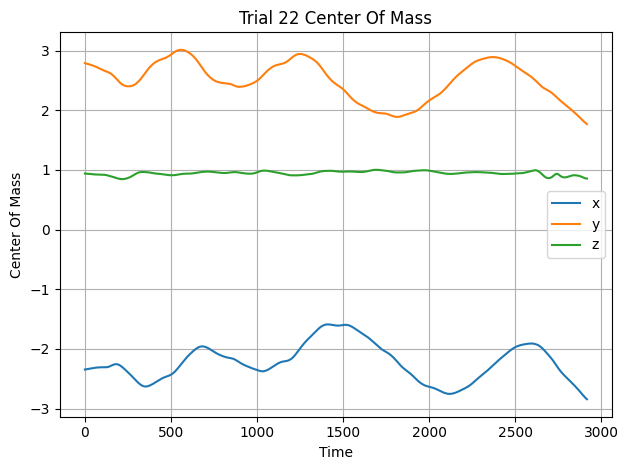

In [6]:

trial_number = 22
tracker = "Center Of Mass"
mat_data = sci.loadmat('./data/Trial22 Kinematics.mat')

# Printing the keys in our .mat file. 
# print(mat_data.keys())  
keys = list(mat_data.keys())
print(keys)
for key in keys: 
    print(key)

center_of_mass_key = keys[-1]

data = mat_data[center_of_mass_key][0][0]
# print(data)
print(len(data))
print("Shape", data.shape)
time_passed = len(data)
time = range(time_passed)

# print(time)

plt.figure(1)
# plt.style.use('seaborn')
plt.plot(time, data)
plt.xlabel("Time")
plt.ylabel("Center Of Mass")
plt.title(f"Trial {trial_number} {tracker}")
plt.legend(['x', 'y', 'z'])
plt.grid(True)
plt.tight_layout()
plt.savefig(f"Trial {trial_number} {tracker}")
plt.show()

# # # Accessing Center Of Mass Data
# print(mat_data[keys[-1]])


# # # # Printing the data raw. 
# # # print(mat_data)


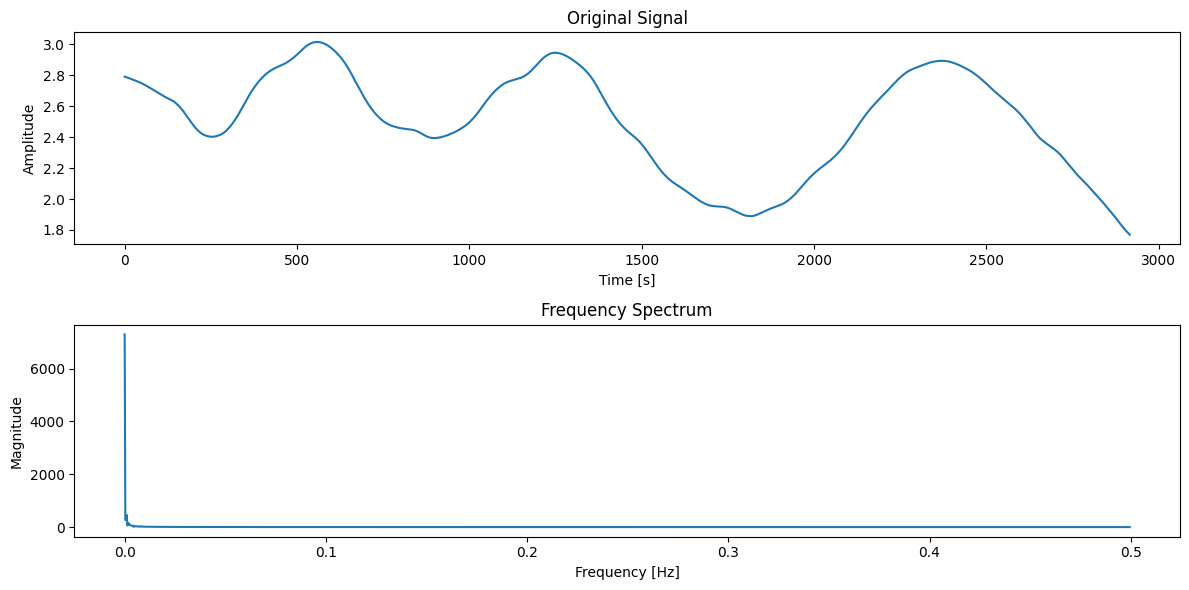

In [16]:
signal = data.T[1]

# Step 1: Calculate the sampling rate from the time array
T = time[1] - time[0]  # Sampling interval (assuming uniform sampling)
sampling_rate = 1.0 / T  # Sampling rate in Hz
N = len(signal)  # Length of the signal

# Step 2: Perform FFT
fft_result = np.fft.fft(signal)
freqs = np.fft.fftfreq(N, T)

# Step 3: Plot the original signal and its frequency spectrum
plt.figure(figsize=(12, 6))

# Plot the original signal in time domain
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the frequency spectrum (magnitude)
plt.subplot(2, 1, 2)
plt.plot(freqs[:N//2], np.abs(fft_result[:N//2]))  # Only positive frequencies
plt.title('Frequency Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()